In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft
import import_ipynb
import function_NGD_20201022
%matplotlib inline

importing Jupyter notebook from function_NGD_20201022.ipynb


In [2]:
def ConeOutput(x,phi):
    dt=0.01
    alpha_c=-9.602*10**-6
    beta_c=7*10**-3 #-1.148*10**-5
    alpha_h=2
    gamma=0.764
    tau_h=1.2
    tau_z=0.5769
    tau_y=0.056
    tau_c=0.05
    Tk=np.arange(0,5,dt)
    Ky=Tk*np.exp(-Tk/tau_y)/tau_y**2 # linear filter for low pass filter
    Kz=gamma*Ky+(1-gamma)*Tk*np.exp(-Tk/tau_z)/tau_z**2 # linear filter for adaptation
    Kh=Tk*np.exp(-Tk/tau_h)/tau_h**2
    # y
    y=np.convolve(x,Ky,'full')
    y=y[0:len(x)]
    # z
    z=np.convolve(x,Kz,'full')
    z=z[0:len(x)]
    # cone differential equation (include horizontal feedback)
#     phi=1
    r=np.zeros(len(x))
    h=np.zeros(len(x))
    yh=np.zeros(len(x))
    for i in range(len(x)-1): # the length of kernel should be i, original length of kernel is len(Kh)
        dr=(alpha_c*y[i]-(1+beta_c*z[i])*(r[i]+phi*h[i]))*dt/tau_c
        dh=(alpha_h*r[i]-h[i])*dt/tau_h
        r[i+1]=r[i]+dr
        h[i+1]=h[i]+dh
    return r,h

## on off increasing contrast

In [3]:
# dt=0.01
# Iavg=1
# T=np.arange(0,50,dt)
# ad=10
# du=3
# times=4
# x=Iavg*np.ones(len(T))
# for n in range(times):
#     onstart=n*int(du*2/dt)+int(ad/dt)
#     offstart=(2*n+1)*int(du/dt)+int(ad/dt)
#     onend=offstart-1
#     offend=(n+1)*int(du*2/dt)-1+int(ad/dt)
#     x[onstart:onend]=Iavg+0.2*(n+1)*Iavg
#     x[offstart:offend]=Iavg-0.2*(n+1)*Iavg
#     print(T[onstart],T[onend])
# plt.plot(T,x)

## OU stimuli

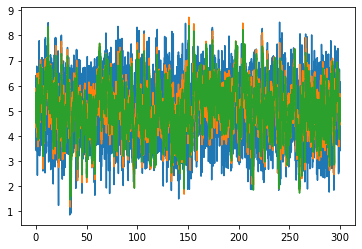

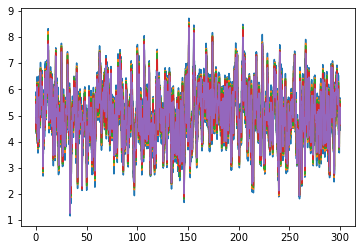

In [4]:
# generate OU input (different tau and different cutoff frequency)
tau_set=[0.1,0.6,1] 
fc=['no',10,7,4,2]
mu, sigma = 0, 1
Tot=300
dt=0.01
T=np.arange(dt,Tot,dt)
ran_seed=np.random.normal(mu,sigma,len(T))
x_set=[[[] for i in range(len(fc))] for j in range(len(tau_set))]
for i in range(len(tau_set)):
    for j in range(len(fc)):
        T,x_set[i][j]=function_NGD_20201022.OU(Tot,tau_set[i],fc[j],dt,ran_seed)
        x_set[i][j]=x_set[i][j]/np.std(x_set[i][j])+5

for i in range(len(tau_set)):
    plt.plot(T,x_set[i][0])
# plt.xlim(100,110)
plt.show()
for i in range(len(fc)):
    plt.plot(T,x_set[1][i])
# plt.xlim(100,110)
plt.show()

(-0.0005, 0.0)

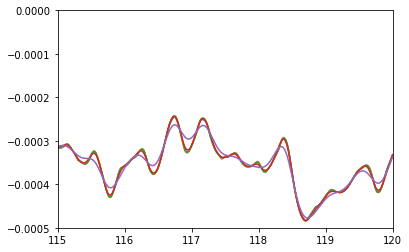

In [5]:
r=[[] for i in range(len(fc))]
for i in range(len(fc)):
        r[i],h=ConeOutput(x_set[1][i],1)
# rb,hb=ConeOutput(x,0)
for i in range(len(fc)):
    plt.plot(T,r[i])
plt.xlim(115,120)
plt.ylim(-0.0005,0)

-0.04999999999999993
-0.04999999999999993
-0.04999999999999993
-0.030000000000000027
0.010000000000000009


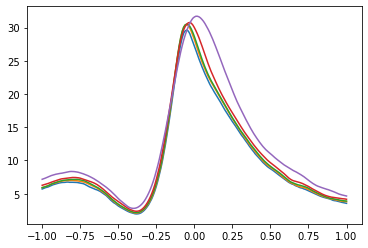

In [6]:
for i in range(len(fc)):
    TS,MI1=function_NGD_20201022.MI(function_NGD_20201022.EqualState(x_set[2][i],8),function_NGD_20201022.EqualState(r[i],8),dt,[-1,1])
    plt.plot(TS,MI1)
    print(TS[np.argmax(MI1)])

In [7]:
# # plt.plot(T,x/np.std(x))
# plt.plot(T,r/np.std(r))
# plt.plot(T,rb/np.std(rb))
# plt.plot(T,h/np.std(h))
# plt.xlim()
# plt.ylim()
# plt.legend(('r, $\phi=1$','r, $\phi=0$','h'))
# plt.show()